In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
colors = ['#F93822','#FDD20E']

In [4]:
block_0 = pd.read_csv('D:\Projects\ElectriciyConsumption/artifacts\halfhourly_dataset\halfhourly_dataset/block_0.csv')

In [9]:
len(block_0['LCLid'].value_counts())

50

In [15]:
info_data = pd.read_csv('D:\Projects\ElectriciyConsumption/artifacts\informations_households.csv')

In [16]:
info_data

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0
...,...,...,...,...,...
5561,MAC002056,Std,ACORN-U,ACORN-U,block_111
5562,MAC004587,Std,ACORN-U,ACORN-U,block_111
5563,MAC004828,Std,ACORN-U,ACORN-U,block_111
5564,MAC001704,ToU,ACORN-U,ACORN-U,block_111


In [17]:
temp  = block_0.merge(info_data,on='LCLid',how='inner')

In [19]:
temp['file'].value_counts()

file
block_0    1222670
Name: count, dtype: int64

In [20]:
weather = pd.read_csv('D:\Projects\ElectriciyConsumption/artifacts\weather_hourly_darksky.csv')

In [21]:
from datetime import datetime as dt

In [22]:
temp['DateTime']= pd.to_datetime(temp['tstp'])

In [23]:
temp = temp.set_index('DateTime')

In [24]:
temp.sample(10)

,LCLid,tstp,energy(kWh/hh),stdorToU,Acorn,Acorn_grouped,file
DateTime,,,,,,,
2012-08-06 13:30:00,MAC004247,2012-08-06 13:30:00.0000000,0.784,Std,ACORN-A,Affluent,block_0
2014-01-21 14:30:00,MAC000246,2014-01-21 14:30:00.0000000,0.305,Std,ACORN-A,Affluent,block_0
2013-07-31 06:00:00,MAC003863,2013-07-31 06:00:00.0000000,0.15,Std,ACORN-A,Affluent,block_0
2012-11-22 01:30:00,MAC003281,2012-11-22 01:30:00.0000000,0.512,Std,ACORN-A,Affluent,block_0
2013-06-29 04:30:00,MAC003718,2013-06-29 04:30:00.0000000,0.09,Std,ACORN-A,Affluent,block_0
2013-08-11 05:30:00,MAC003719,2013-08-11 05:30:00.0000000,0.151,Std,ACORN-A,Affluent,block_0
2013-03-12 19:00:00,MAC003422,2013-03-12 19:00:00.0000000,1.0319999,Std,ACORN-A,Affluent,block_0
2012-05-17 14:30:00,MAC004431,2012-05-17 14:30:00.0000000,0.292,Std,ACORN-A,Affluent,block_0
2013-09-20 15:30:00,MAC003394,2013-09-20 15:30:00.0000000,0.237,Std,ACORN-A,Affluent,block_0


In [25]:
temp.drop('tstp',axis=1,inplace=True)

In [26]:
temp['energy(kWh/hh)'] = pd.to_numeric(temp['energy(kWh/hh)'],errors='coerce')

In [28]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1222670 entries, 2012-10-12 00:30:00 to 2014-02-28 00:00:00
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   LCLid           1222670 non-null  object 
 1   energy(kWh/hh)  1222620 non-null  float64
 2   stdorToU        1222670 non-null  object 
 3   Acorn           1222670 non-null  object 
 4   Acorn_grouped   1222670 non-null  object 
 5   file            1222670 non-null  object 
dtypes: float64(1), object(5)
memory usage: 65.3+ MB


In [29]:
temp_hourly = temp.resample('h').agg({
    'LCLid': 'first',
    'energy(kWh/hh)': 'mean',  # aggregate numeric column with mean or sum as needed
    'stdorToU': 'first',
    'Acorn': 'first',
    'Acorn_grouped': 'first',
    'file': 'first'
}).reset_index()

In [30]:
temp_hourly.head(10)

,DateTime,LCLid,energy(kWh/hh),stdorToU,Acorn,Acorn_grouped,file
0,2011-12-03 09:00:00,MAC000246,0.1515,Std,ACORN-A,Affluent,block_0
1,2011-12-03 10:00:00,MAC000246,0.9735,Std,ACORN-A,Affluent,block_0
2,2011-12-03 11:00:00,MAC000246,0.3660,Std,ACORN-A,Affluent,block_0
3,2011-12-03 12:00:00,MAC000246,0.7975,Std,ACORN-A,Affluent,block_0
4,2011-12-03 13:00:00,MAC000246,0.1050,Std,ACORN-A,Affluent,block_0
5,2011-12-03 14:00:00,MAC000246,0.0530,Std,ACORN-A,Affluent,block_0
6,2011-12-03 15:00:00,MAC000246,0.0485,Std,ACORN-A,Affluent,block_0
7,2011-12-03 16:00:00,MAC000246,0.0660,Std,ACORN-A,Affluent,block_0
8,2011-12-03 17:00:00,MAC000246,0.0900,Std,ACORN-A,Affluent,block_0
9,2011-12-03 18:00:00,MAC000246,0.0760,Std,ACORN-A,Affluent,block_0


In [31]:
weather = weather.rename(columns={'time':'DateTime'})

In [32]:
weather['DateTime'] = pd.to_datetime(weather['DateTime'])

In [33]:
data_0 = temp_hourly.merge(weather,on='DateTime',how='inner')

In [35]:
data_0.head()

,DateTime,LCLid,energy(kWh/hh),stdorToU,Acorn,Acorn_grouped,file,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,2011-12-03 09:00:00,MAC000246,0.1515,Std,ACORN-A,Affluent,block_0,13.07,262,11.00,8.84,1002.07,11.00,5.99,rain,partly-cloudy-day,0.87,Partly Cloudy
1,2011-12-03 10:00:00,MAC000246,0.9735,Std,ACORN-A,Affluent,block_0,12.76,268,11.42,7.52,1002.76,11.42,6.10,rain,partly-cloudy-day,0.77,Partly Cloudy
2,2011-12-03 11:00:00,MAC000246,0.3660,Std,ACORN-A,Affluent,block_0,13.07,274,11.41,6.39,1003.24,11.41,6.20,rain,partly-cloudy-day,0.71,Partly Cloudy
3,2011-12-03 12:00:00,MAC000246,0.7975,Std,ACORN-A,Affluent,block_0,13.07,277,11.33,5.42,1003.22,11.33,6.60,rain,partly-cloudy-day,0.67,Partly Cloudy
4,2011-12-03 13:00:00,MAC000246,0.1050,Std,ACORN-A,Affluent,block_0,13.07,277,11.41,5.07,1003.29,11.41,7.05,rain,partly-cloudy-day,0.65,Partly Cloudy


In [36]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DateTime             19622 non-null  datetime64[ns]
 1   LCLid                19622 non-null  object        
 2   energy(kWh/hh)       19622 non-null  float64       
 3   stdorToU             19622 non-null  object        
 4   Acorn                19622 non-null  object        
 5   Acorn_grouped        19622 non-null  object        
 6   file                 19622 non-null  object        
 7   visibility           19622 non-null  float64       
 8   windBearing          19622 non-null  int64         
 9   temperature          19622 non-null  float64       
 10  dewPoint             19622 non-null  float64       
 11  pressure             19611 non-null  float64       
 12  apparentTemperature  19622 non-null  float64       
 13  windSpeed            19622 non-

In [37]:
data_0.describe()

,DateTime,energy(kWh/hh),visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,humidity
count,19622,19622.000000,19622.000000,19622.000000,19622.00000,19622.000000,19611.000000,19622.000000,19622.000000,19622.000000
mean,2013-01-15 03:55:05.901539072,0.449294,11.289593,197.390684,10.53376,6.550201,1013.984610,9.272357,3.927276,0.779753
min,2011-12-03 09:00:00,0.029500,0.270000,0.000000,-5.64000,-9.980000,975.740000,-8.880000,0.040000,0.230000
25%,2012-06-24 18:15:00,0.296886,10.360000,127.000000,6.41000,2.720000,1007.320000,3.740000,2.430000,0.700000
50%,2013-01-15 03:30:00,0.440525,12.310000,219.000000,9.98000,6.620000,1014.480000,9.750000,3.710000,0.810000
75%,2013-08-07 12:45:00,0.582515,13.080000,257.000000,14.63000,10.470000,1021.860000,14.630000,5.110000,0.890000
max,2014-02-28 00:00:00,1.870000,16.090000,359.000000,32.40000,19.880000,1043.320000,32.420000,14.800000,1.000000
std,NaN,0.211439,2.976044,90.831584,5.92468,5.156018,11.460342,7.109983,2.041309,0.140158


In [38]:
numerical_data  = data_0.select_dtypes(exclude='object')

In [39]:
numerical_data.head()

,DateTime,energy(kWh/hh),visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,humidity
0,2011-12-03 09:00:00,0.1515,13.07,262,11.00,8.84,1002.07,11.00,5.99,0.87
1,2011-12-03 10:00:00,0.9735,12.76,268,11.42,7.52,1002.76,11.42,6.10,0.77
2,2011-12-03 11:00:00,0.3660,13.07,274,11.41,6.39,1003.24,11.41,6.20,0.71
3,2011-12-03 12:00:00,0.7975,13.07,277,11.33,5.42,1003.22,11.33,6.60,0.67
4,2011-12-03 13:00:00,0.1050,13.07,277,11.41,5.07,1003.29,11.41,7.05,0.65


In [40]:
categorical_data = data_0.select_dtypes(include='object')

In [41]:
categorical_data.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file,precipType,icon,summary
0,MAC000246,Std,ACORN-A,Affluent,block_0,rain,partly-cloudy-day,Partly Cloudy
1,MAC000246,Std,ACORN-A,Affluent,block_0,rain,partly-cloudy-day,Partly Cloudy
2,MAC000246,Std,ACORN-A,Affluent,block_0,rain,partly-cloudy-day,Partly Cloudy
3,MAC000246,Std,ACORN-A,Affluent,block_0,rain,partly-cloudy-day,Partly Cloudy
4,MAC000246,Std,ACORN-A,Affluent,block_0,rain,partly-cloudy-day,Partly Cloudy


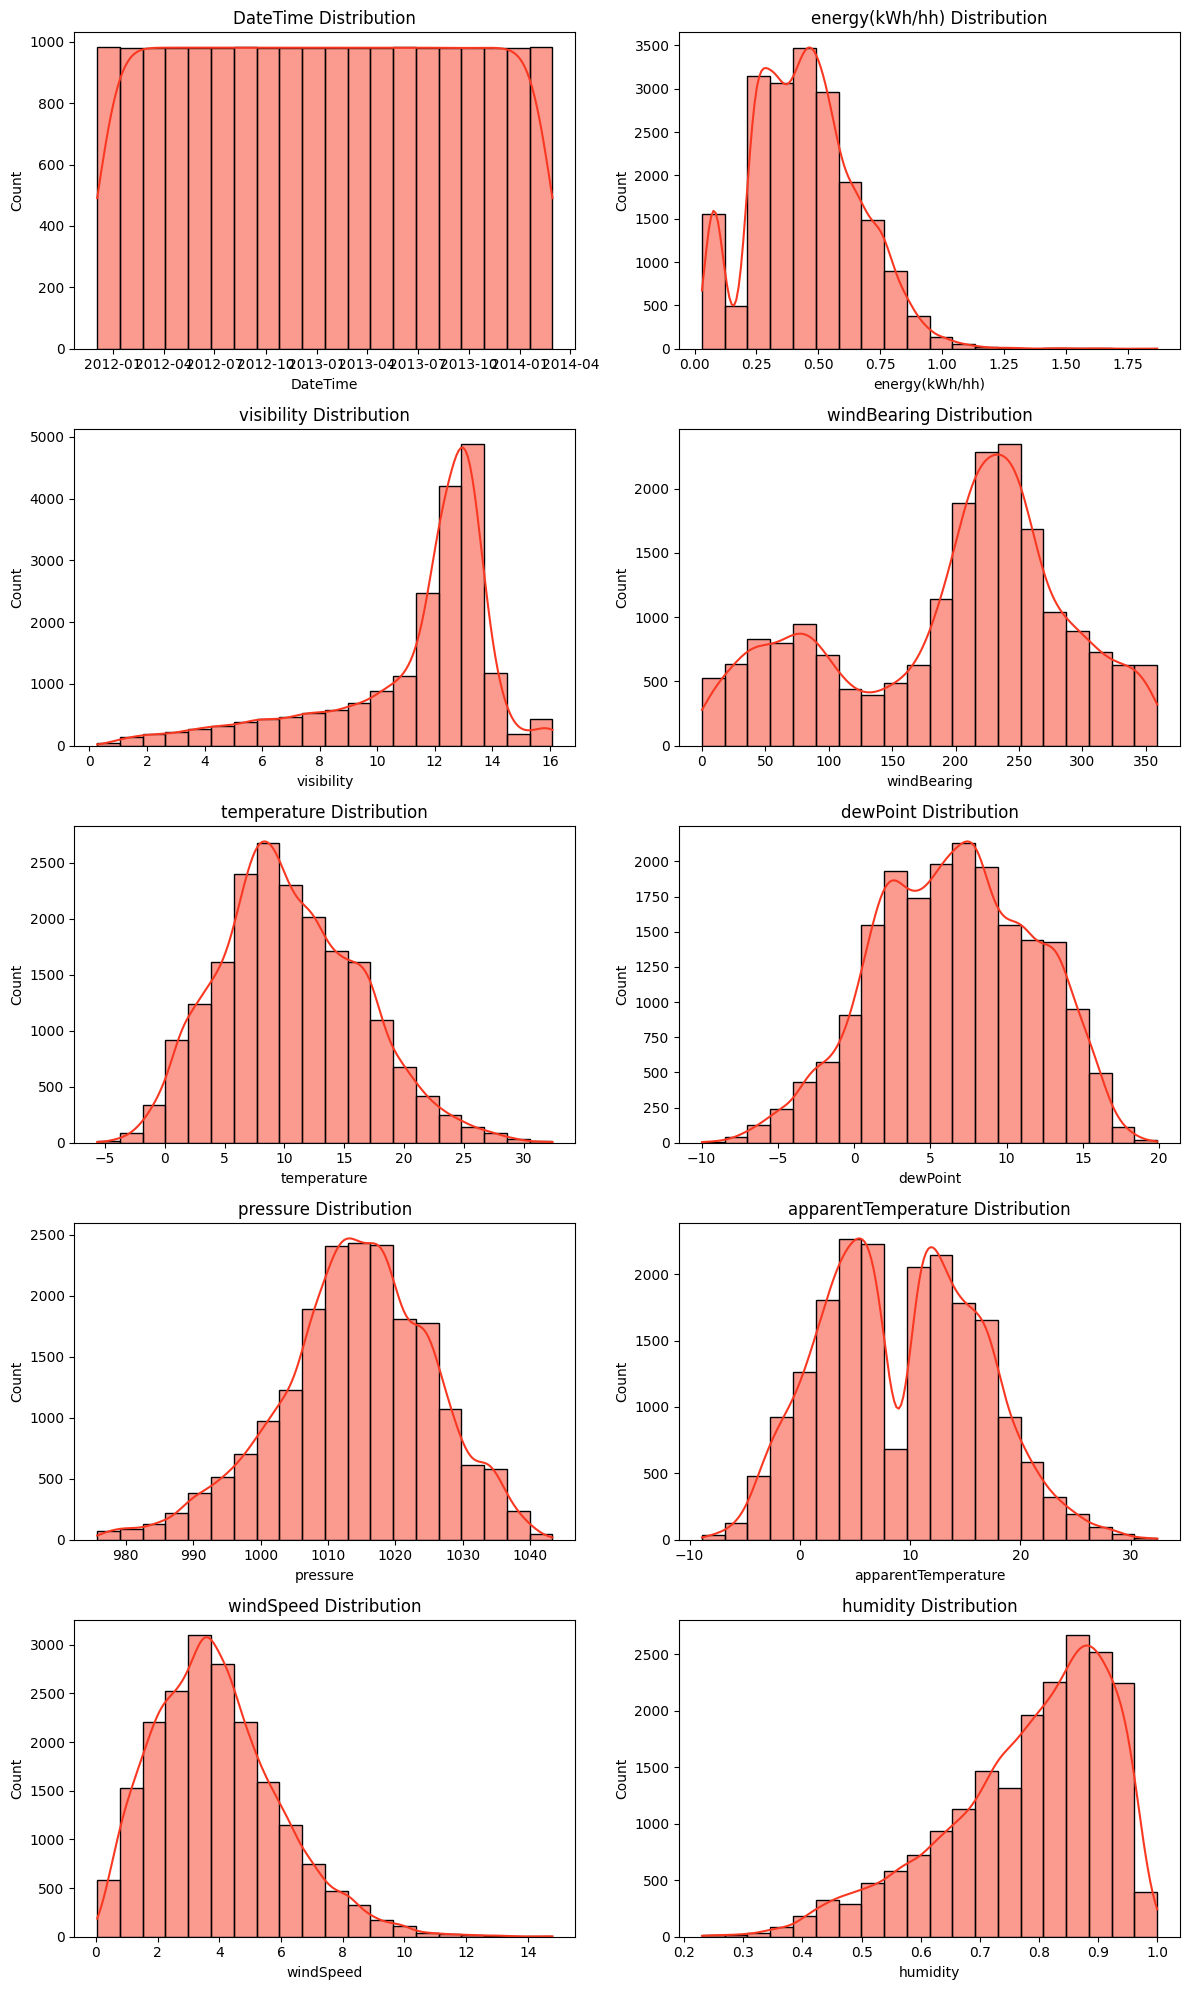

In [63]:
numerical_columns = data_0.select_dtypes(exclude='object').columns

n_cols = 2
n_rows = (len(numerical_columns)+n_cols-1)//n_cols

fig , axes = plt.subplots(n_rows,n_cols,figsize=(12,n_rows *4))

axes = axes.flatten()

for i,col in enumerate(numerical_columns):
    sns.histplot(data_0[col],bins=20,kde=True,ax=axes[i],color=colors[0])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)

for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show();
    


### Insights
* Energy - Energy distribution is skewed to right so there will be possibility of outliers which can affect the model
* Visibility - Visibility is left skewed so it states that maximum 50 percentile of data have higher visibility
* WindSpeed - WindSpeed right skewed and 75 percentile of data have ~5 wind speed so there are potential outliers
* Humidity - Humidity left skeed so there Seasonal or Environmental Patterns: The left skew could suggest that low-humidity conditions only occur under specific circumstances, such as particular seasons, times of day, or weather conditions (e.g., during certain dry periods or due to specific weather events).

<Axes: >

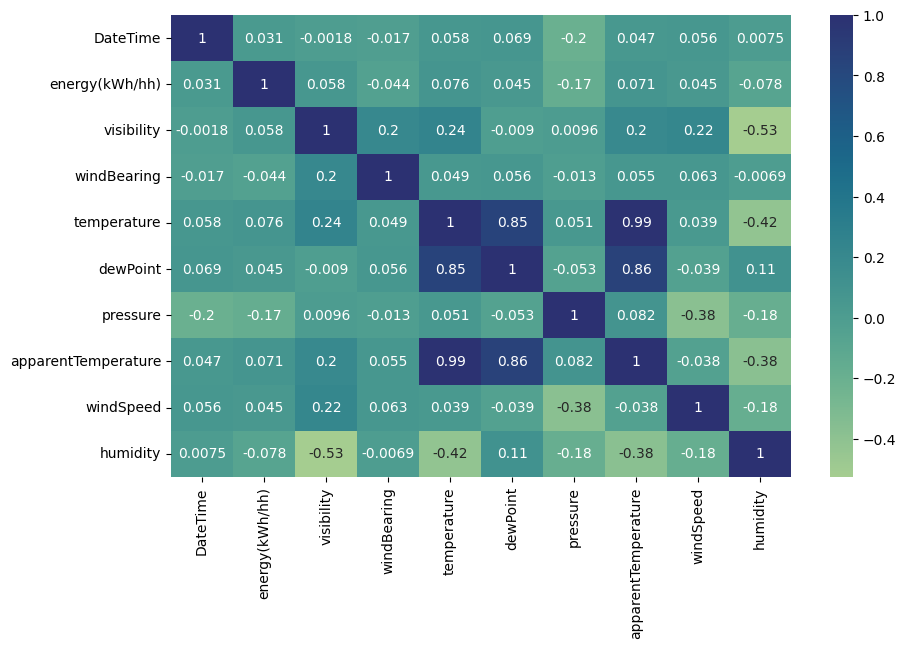

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical_data.corr(),annot=True,cmap='crest')

Weather Influence on Energy Consumption: While temperature, dew point, and pressure correlate slightly with energy consumption, none of these correlations are strong, indicating multiple factors likely influence energy use.
Visibility and Humidity: The strong negative correlation suggests high humidity substantially reduces visibility, a common finding in weather studies. *Temperature Relationships: The close link between temperature, dew point, and apparent temperature highlights typical weather dynamics, where higher temperatures align with a higher perceived temperature but lower humidity.

In [47]:
temp_hourly = temp_hourly.set_index(temp_hourly['DateTime'])

In [48]:
temp_6H = temp_hourly.resample('6H').agg({
    'energy(kWh/hh)':'mean'
})

temp_daily = temp_hourly.resample('D').agg({
    'energy(kWh/hh)':'mean'
})

temp_monthly = temp_hourly.resample('M').agg({
    'energy(kWh/hh)':'mean'
})

temp_3month = temp_hourly.resample('3M').agg({
    'energy(kWh/hh)':'mean'
})

temp_yearly = temp_hourly.resample('Y').agg({
    'energy(kWh/hh)':'mean'
})

C:\Users\amirb\AppData\Local\Temp\ipykernel_10860\2892231529.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp_6H = temp_hourly.resample('6H').agg({
C:\Users\amirb\AppData\Local\Temp\ipykernel_10860\2892231529.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_monthly = temp_hourly.resample('M').agg({
C:\Users\amirb\AppData\Local\Temp\ipykernel_10860\2892231529.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_3month = temp_hourly.resample('3M').agg({
C:\Users\amirb\AppData\Local\Temp\ipykernel_10860\2892231529.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  temp_yearly = temp_hourly.resample('Y').agg({


In [76]:
weather = weather.set_index(weather['DateTime'])

In [77]:
weather_6H = weather.resample('6H').agg({
    'temperature':'mean'
})

weather_daily = weather.resample('D').agg({
    'temperature':'mean'
})

weather_monthly = weather.resample('M').agg({
    'temperature':'mean'
})

weather_3month = weather.resample('3M').agg({
    'temperature':'mean'
})

weather_yearly = weather.resample('Y').agg({
    'temperature':'mean'
})


weather_6H = weather_6H.reset_index()
weather_daily = weather_daily.reset_index()
weather_monthly = weather_monthly.reset_index()
weather_3month = weather_3month.reset_index()
weather_yearly = weather_yearly.reset_index()

In [51]:
temp_monthly = temp_monthly.reset_index()
temp_3month = temp_3month.reset_index()
temp_daily = temp_daily.reset_index()
temp_hourly = temp_hourly.reset_index()
temp_6H = temp_6H.reset_index()
temp_yearly = temp_yearly.reset_index()

ValueError: cannot insert DateTime, already exists

KeyError: 1

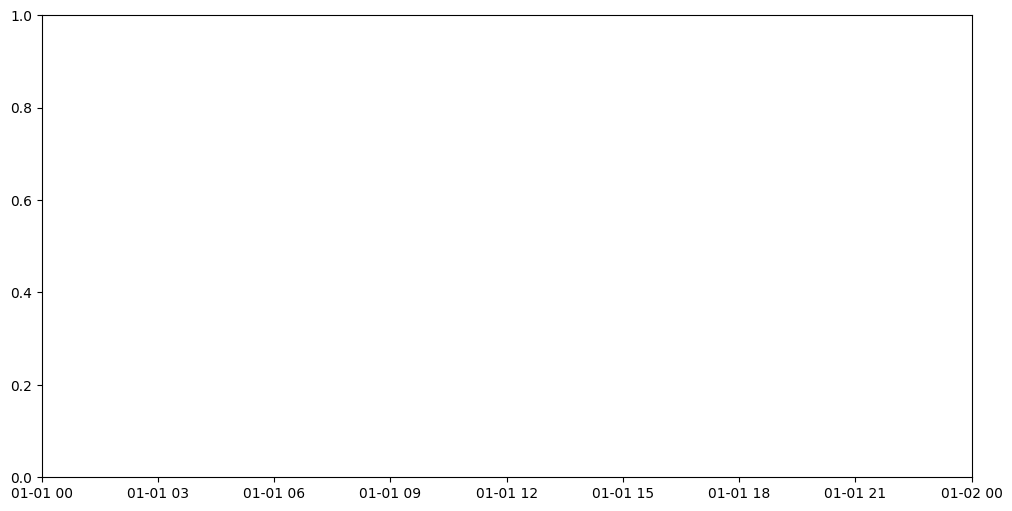

In [85]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=temp_monthly,x='DateTime',y='energy(kWh/hh)',color = colors[0],ax=ax1,marker=dict(size=temp_monthly["energy(kWh/hh)"], sizemode='area', sizeref=2.*max(temp_monthly["energy(kWh/hh)"])/(40.**2)))

ax1.set_ylabel("Temperature (°C)", color=colors[0])  # Set label for primary y-axis
ax1.tick_params(axis='y', labelcolor=colors[0])

ax2 = ax1.twinx()
sns.lineplot(data=weather_monthly,x='DateTime',y='temperature',color = colors[1],ax=ax2)
ax2.set_ylabel("Energy (kWh/hh)", color=colors[1])  # Set label for secondary y-axis
ax2.tick_params(axis='y', labelcolor=colors[1])  # Set tick color for secondary y-axis

# Add titles and legend
plt.title("Temperature and Energy Consumption Over Months")
fig.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [88]:
import plotly.express as px
import pandas as pd

# Example DataFrame (replace with your actual data)
temp_monthly = pd.DataFrame({
    "DateTime": ["2024-01", "2024-02", "2024-03", "2024-04", "2024-05"],
    "energy(kWh/hh)": [100, 150, 200, 250, 300]
})

# Create the plot
fig = px.line(
    temp_monthly,
    x="DateTime",
    y="energy(kWh/hh)",
    title="Energy Consumption Over Monthly",
    markers=True
)

# Update trace with marker sizes
fig.update_traces(
    marker=dict(
        size=temp_monthly["energy(kWh/hh)"],  # Array of sizes
        sizemode='area',
        sizeref=2.0 * max(temp_monthly["energy(kWh/hh)"]) / (40.0 ** 2)  # Normalize sizes
    )
)

# Show the plot
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [2]:
import pandas as pd

In [8]:
data = pd.read_csv("D:\Projects\ElectriciyConsumption\src/research\data\data.csv")

In [11]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210361 entries, 0 to 210360
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   timestamp           210361 non-null  datetime64[ns]
 1   day_of_week         210361 non-null  int64         
 2   hour_of_day         210361 non-null  int64         
 3   is_weekend          210361 non-null  int64         
 4   temperature         210361 non-null  float64       
 5   is_holiday          210361 non-null  int64         
 6   solar_generation    210361 non-null  float64       
 7   electricity_demand  210361 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 12.8 MB


In [17]:
data = pd.read_csv('D:\Projects\ElectriciyConsumption\src/research\data/24-hours testset - Copy.csv')

In [18]:
data = data.rename(columns={'timestamp':'DateTime'})

In [19]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [34]:
start_date = '2024-11-27 20:00:00'
end_date = '2024-11-29 04:00:00'

In [35]:
filtered_df = data[(data['DateTime'] >= start_date) & (data['DateTime'] <= end_date)]

In [36]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 7964 to 7996
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DateTime            33 non-null     datetime64[ns]
 1   day_of_week         33 non-null     int64         
 2   hour_of_day         33 non-null     int64         
 3   is_weekend          33 non-null     int64         
 4   temperature         33 non-null     float64       
 5   is_holiday          33 non-null     int64         
 6   solar_generation    33 non-null     float64       
 7   electricity_demand  33 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 2.3 KB


In [37]:
lags = [1,3]
for lag in lags:
    filtered_df[f'Previous_{lag}_hour_demand'] = filtered_df['electricity_demand'].shift(lag)

C:\Users\amirb\AppData\Local\Temp\ipykernel_9936\45968927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[f'Previous_{lag}_hour_demand'] = filtered_df['electricity_demand'].shift(lag)
C:\Users\amirb\AppData\Local\Temp\ipykernel_9936\45968927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[f'Previous_{lag}_hour_demand'] = filtered_df['electricity_demand'].shift(lag)


In [38]:
filtered_df['rolling_mean_3'] = filtered_df['electricity_demand'].rolling(window=3).mean()
filtered_df['rolling_std_3'] = filtered_df['electricity_demand'].rolling(window=3).std()

C:\Users\amirb\AppData\Local\Temp\ipykernel_9936\3561879384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rolling_mean_3'] = filtered_df['electricity_demand'].rolling(window=3).mean()
C:\Users\amirb\AppData\Local\Temp\ipykernel_9936\3561879384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rolling_std_3'] = filtered_df['electricity_demand'].rolling(window=3).std()


In [39]:
filtered_df = filtered_df.dropna()

In [40]:
filtered_df

,DateTime,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand,Previous_1_hour_demand,Previous_3_hour_demand,rolling_mean_3,rolling_std_3
7967,2024-11-27 23:00:00,2,23,0,24.842043,0,0.264426,624.832425,565.060476,756.773338,620.143203,52.894238
7968,2024-11-28 00:00:00,3,0,0,30.595843,0,8.263751,528.907941,624.832425,670.536707,572.933614,48.444467
7969,2024-11-28 01:00:00,3,1,0,30.406907,0,9.880211,482.179799,528.907941,565.060476,545.306721,72.726425
7970,2024-11-28 02:00:00,3,2,0,27.858723,0,0.162468,538.100140,482.179799,624.832425,516.395960,29.986387
7971,2024-11-28 03:00:00,3,3,0,29.057528,0,7.960116,542.759850,538.100140,528.907941,521.013263,33.711373
7972,2024-11-28 04:00:00,3,4,0,27.232028,0,8.137783,543.081403,542.759850,482.179799,541.313798,2.787749
7973,2024-11-28 05:00:00,3,5,0,22.021222,0,0.478002,535.221451,543.081403,538.100140,540.354235,4.448028
7974,2024-11-28 06:00:00,3,6,0,26.964373,0,260.122523,421.529250,535.221451,542.759850,499.944035,68.022816
7975,2024-11-28 07:00:00,3,7,0,33.770261,0,81.927334,536.789285,421.529250,543.081403,497.846662,66.097466
7976,2024-11-28 08:00:00,3,8,0,32.027143,0,182.133195,457.498984,536.789285,535.221451,471.939173,58.971249


In [27]:
filtered_df.to_csv('current_data.csv')

In [1]:
from src.ElectriciyConsumption.utils import fetch_historical_data

RuntimeError: Error loading the model: [Errno 2] No such file or directory: 'src\\models\\regression_model.pkl'